In [393]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from tqdm import tqdm

In [394]:
df = pd.read_csv("SpotifyFeatures.csv")

<h1>EDA (Exploratory Data Analysis) + Nettoyage</h2>

In [395]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

**Traitement des valeurs nulles**

In [397]:
df.isna().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Une seule valeur nulle dans la colonne 'track_name'.

In [398]:
df[df['track_name'].isna()].index

Index([208285], dtype='int64')

In [399]:
df.iloc[208285]

genre                                World
artist_name              Elevation Worship
track_name                             NaN
track_id            7BGQCe62A58Q5ZgpQFX93t
popularity                              44
acousticness                         0.019
danceability                         0.287
duration_ms                         350027
energy                               0.446
instrumentalness                       0.0
key                                      F
liveness                               0.1
loudness                            -7.214
mode                                 Major
speechiness                         0.0317
tempo                              138.727
time_signature                         4/4
valence                             0.0387
Name: 208285, dtype: object

track_id = l'URI nous mène vers la track sur spotify
https://open.spotify.com/intl-fr/track/ 7BGQCe62A58Q5ZgpQFX93t 

Le titre du morceau s'appelle "None".

In [400]:
df = df.fillna('None')

<h2>Analyse et nettoyage des colonnes</h2>

In [401]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

**Colonnes catégorielles**

In [402]:
colonnes_cat = df.select_dtypes(include=['object'])
colonnes_cat

,genre,artist_name,track_name,track_id,key,mode,time_signature
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,C#,Major,4/4
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,F#,Minor,4/4
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,C,Minor,5/4
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,C#,Major,4/4
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,F,Major,4/4
...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,D,Major,4/4
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,E,Minor,4/4
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,D,Major,4/4
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,A,Major,4/4


***Genre***

In [403]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

erreur observée : "Children's Music", 'Children’s Music'

In [404]:
print(f"Il y a {df['genre'].nunique()} genres uniques dans le dataset" )

Il y a 27 genres uniques dans le dataset


In [405]:
df['genre'] = df['genre'].str.replace('’', "'", regex=False)
df['genre'] = df['genre'].str.lower().str.strip()

In [406]:
print(f"Il y a {df['genre'].nunique()} genres uniques dans le dataset" )

Il y a 26 genres uniques dans le dataset


constat d'incohérence probant :????

***Artist name***


In [407]:
print(f"Il y a {df['artist_name'].nunique()} noms d'artistes uniques dans ce dataset.")

Il y a 14564 noms d'artistes uniques dans ce dataset.


In [408]:
df['artist_name'].value_counts().head(28)

artist_name
Giuseppe Verdi              1394
Giacomo Puccini             1137
Kimbo Children's Music       971
Nobuo Uematsu                825
Richard Wagner               804
Wolfgang Amadeus Mozart      800
Randy Newman                 757
Georges Bizet                701
Juice Music                  684
Johann Sebastian Bach        632
Ludwig van Beethoven         596
Hans Zimmer                  559
Gioachino Rossini            491
Chorus                       480
Howard Shore                 479
Drake                        477
Henri Salvador               474
John Williams                450
Frédéric Chopin              436
Alan Menken                  420
Chris Brown                  392
Bob Marley & The Wailers     380
Dorothée                     378
Gaetano Donizetti            377
Children Songs Company       371
Max Richter                  365
Capcom Sound Team            326
Future                       317
Name: count, dtype: int64

In [409]:
df['artist_name'] = df['artist_name'].str.replace('’', "'", regex=False)  # apostrophe typographique
df['artist_name'] = df['artist_name'].str.lower().str.strip()  # minuscule + suppression espaces    

In [410]:
print(f"Il y a {df['artist_name'].nunique()} noms d'artistes uniques dans ce dataset.")

Il y a 14561 noms d'artistes uniques dans ce dataset.


L'artiste au plus grand nombre de titres dans le dataset est Verdi qui en compte 1394.

***Track name***

In [411]:
print(f"Il y a {df['track_name'].nunique()} noms de titres uniques dans ce dataset.")

Il y a 148615 noms de titres uniques dans ce dataset.


***Track id***

In [412]:
print(f"Il y a {df['track_id'].nunique()} URI uniques dans ce dataset.")

Il y a 176774 URI uniques dans ce dataset.


In [413]:
df['track_id'].value_counts().head(28)

track_id
6sVQNUvcVFTXvlk3ec0ngd    8
3R73Y7X53MIQZWnKloWq5i    8
6AIte2Iej1QKlaofpjCzW1    8
0UE0RhnRaEYsiYgXpyLoZc    8
3uSSjnDMmoyERaAK9KvpJR    8
0wY9rA9fJkuESyYm9uzVK5    8
5g3TDpgy1J1woAUVuj21EE    7
3nXrCAE44KlevAkQB2XWcN    7
6M6UoxIPn4NOWW0x7JPRfv    7
6NqbN00vLmWfrQSx2wjD4z    7
3GZD6HmiNUhxXYf8Gch723    7
4tggZyGJMNJMooWuRbvN5q    7
5rAff9XfcWx7rguN3t0fkW    7
1FTSo4v6BOZH9QxKc3MbVM    7
5gW5dSy3vXJxgzma4rQuzH    7
2q0VexHJirnUPnEOhr2DxK    7
5lcyIeEfwZTs8Ajw3kdF7P    7
7qCZgvV98j6RjUULW1s1it    7
6TFUZ8Bt1brEwomY90SKXi    7
4bnjq8zqtCnxTGxll5ezOO    7
5YxaccATvDTIOpue7vu6Tn    7
7rAUH8YZRvGyZ5wmoKjYbG    7
2CInzVilMduj9L8dDXwyUA    7
6INaSJ4clfZ8pvXSGZQnJ7    7
6NueIkCzLhp4rXpNAiXDdh    7
1HwbgJAU9PZ7YbzKgVgoIF    7
2gE0khQ948RYQOeTgCUL2a    7
0725YWm6Z0TpZ6wrNk64Eb    7
Name: count, dtype: int64

**Analyse croisée artist_name / track_name :**

In [414]:
df[df['artist_name'] == 'Giuseppe Verdi']['track_name'].value_counts().head(10)

Series([], Name: count, dtype: int64)

En prenant Verdi pour exemple on observe qu'un même titre peut apparaitre plusieurs fois dans le dataset.

Pour éviter les doublons, nous conservons la version la plus populaire pour chaque couple track_name / artist_name.

In [415]:
df= df.loc[df.groupby(['track_name', 'artist_name'])['popularity'].idxmax()]
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 176494 lignes.


***Key***

In [416]:
df['key'].unique()

array(['F', 'C#', 'G#', 'C', 'D', 'D#', 'G', 'B', 'A#', 'A', 'E', 'F#'],
      dtype=object)

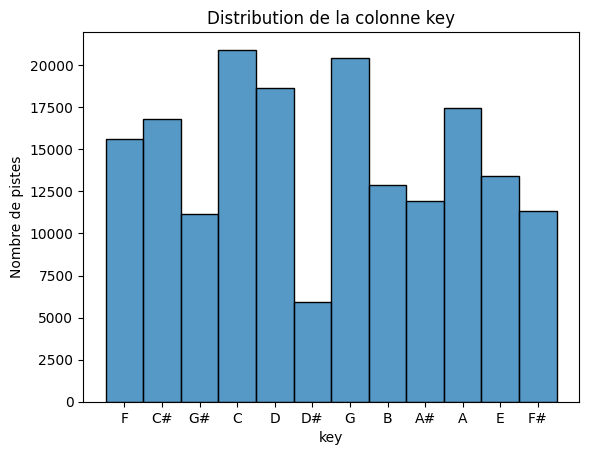

In [417]:
counts_key = df['key'].value_counts()
sns.histplot(data=df, x="key")
plt.title('Distribution de la colonne key')
plt.xlabel('key')
plt.ylabel('Nombre de pistes')
plt.show()

/tmp/ipykernel_3461/2659825684.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


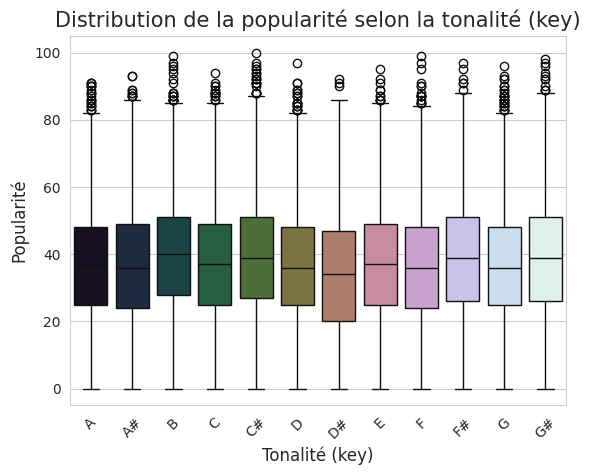

In [418]:
# Boxplot pour la variable "key"
# Objectif : visualiser la distribution d'une variable numérique (par exemple "popularity") selon chaque tonalité ("key")

sns.set_style("whitegrid")  # Ajoute une grille de fond pour une meilleure lisibilité

# Création du boxplot : on affiche la distribution de la popularité pour chaque "key"
ax = sns.boxplot(
    data=df,                  # DataFrame contenant les données
    x="key",                          # Variable catégorielle sur l'axe des x (tonalité)
    y="popularity",                   # Variable numérique sur l'axe des y (exemple : popularité)
    palette="cubehelix",              # Palette de couleurs pour différencier les tonalités
    order=sorted(df["key"].unique())  # Trie les tonalités pour un affichage ordonné
)

# Ajout d'un titre et de labels explicites pour les axes
plt.title('Distribution de la popularité selon la tonalité (key)', fontsize=15)
plt.xlabel('Tonalité (key)', fontsize=12)
plt.ylabel('Popularité', fontsize=12)

# Optionnel : rotation des labels x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Affichage du graphique final
plt.show()

***Mode***

In [419]:
df["mode"].unique()

array(['Major', 'Minor'], dtype=object)

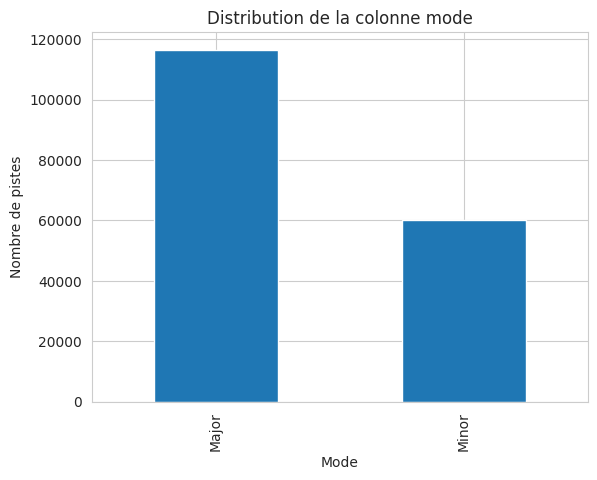

In [420]:
counts = df['mode'].value_counts()
counts.plot(kind='bar')
plt.title('Distribution de la colonne mode')
plt.xlabel('Mode')
plt.ylabel('Nombre de pistes')
plt.show()

***Time signature***

In [421]:
df['time_signature'].describe()

count     176494
unique         5
top          4/4
freq      148946
Name: time_signature, dtype: object

In [422]:
df['time_signature'].unique()

array(['4/4', '3/4', '5/4', '1/4', '0/4'], dtype=object)

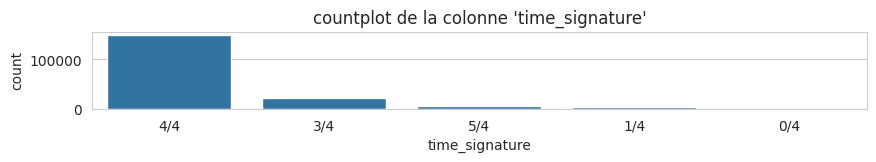

In [423]:
plt.figure(figsize=(10, 1))
sns.countplot(x=df['time_signature'])
plt.title("countplot de la colonne 'time_signature'")
plt.show()

- je supprime les valeurs aberrantes 0 Impossible en musique → à supprimer
- et 1 Musicalement peu plausible → probablement une erreur de parsing ou un tag incohérent

In [424]:
# Extraire uniquement le numérateur de la signature (4, 5, 3, etc.) pour en faire une colonne numérique propre.
# Étape 1 : Extraire la partie avant le '/' et la convertir en entier
df['time_signature_clean'] = df['time_signature'].str.extract(r'^(\d+)').astype('Int64')
df['time_signature'] = df['time_signature_clean']
df.drop(columns='time_signature_clean', inplace=True)


df = df[df['time_signature'].isin([3, 4, 5])]
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
58300,opera,maria callas,""" La Traviata "" : Amami Alfredo (Act II) - Dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4,0.0394
32571,anime,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3,0.0835
89661,hip-hop,rae sremmurd,"""42"" - From SR3MM",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4,0.3240
142359,indie,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4,0.4230
33675,anime,yuki hayashi,"""6人で(強い方が強い)""",0qwK0LvMyAQ7J1rEEL6nbr,17,0.971000,0.176,171000,0.125,0.904000,C,0.129,-16.699,Major,0.0349,136.076,3,0.0461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,pop,got7,하드캐리 Hard Carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4,0.6120
219320,world,park hyo shin,해줄 수 없는 일 Haejul Su Eomneun Il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4,0.1550
149889,pop,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4,0.6510
220337,world,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4,0.2740


**Colonnes numériques**

In [425]:
# Sélection numérique
colonnes_num = df.select_dtypes(include=['float64', 'int64'])
colonnes_num

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
58300,31,0.993000,0.364,131933,0.275,0.028400,0.293,-11.832,0.0430,86.096,4,0.0394
32571,23,0.025000,0.250,158000,0.762,0.516000,0.094,-12.794,0.0468,89.093,3,0.0835
89661,53,0.002750,0.968,238020,0.563,0.000000,0.108,-6.744,0.1250,130.039,4,0.3240
142359,48,0.000696,0.315,202493,0.970,0.000000,0.277,-4.709,0.1020,178.068,4,0.4230
33675,17,0.971000,0.176,171000,0.125,0.904000,0.129,-16.699,0.0349,136.076,3,0.0461
...,...,...,...,...,...,...,...,...,...,...,...,...
150871,63,0.014800,0.700,193579,0.873,0.000000,0.343,-2.901,0.0869,99.972,4,0.6120
219320,30,0.729000,0.332,260600,0.493,0.000000,0.165,-6.126,0.0318,110.024,4,0.1550
149889,64,0.002110,0.613,205149,0.874,0.000000,0.134,-3.712,0.0335,102.975,4,0.6510
220337,27,0.513000,0.521,298760,0.423,0.000004,0.131,-6.770,0.0324,59.036,4,0.2740


In [426]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
count,174147.000000,174147.000000,174147.000000,1.741470e+05,174147.000000,174147.000000,174147.000000,174147.000000,174147.000000,174147.000000,174147.0,174147.000000
mean,36.651094,0.399285,0.542864,2.366167e+05,0.559700,0.170894,0.223385,-10.060893,0.125489,117.357683,3.90612,0.453561
std,17.571754,0.365001,0.189887,1.301252e+05,0.274787,0.321895,0.209519,6.342929,0.200711,31.323542,0.368644,0.267626
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,3.0,0.000000
25%,25.000000,0.044200,0.417000,1.789730e+05,0.350000,0.000000,0.097400,-12.724000,0.036800,92.051000,4.0,0.224000
50%,37.000000,0.279000,0.560000,2.197530e+05,0.595000,0.000070,0.130000,-8.132000,0.049400,115.067000,4.0,0.443000
75%,49.000000,0.783000,0.684000,2.687330e+05,0.791000,0.087200,0.276000,-5.606000,0.101000,139.009500,4.0,0.669000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,5.0,1.000000


***Popularity***

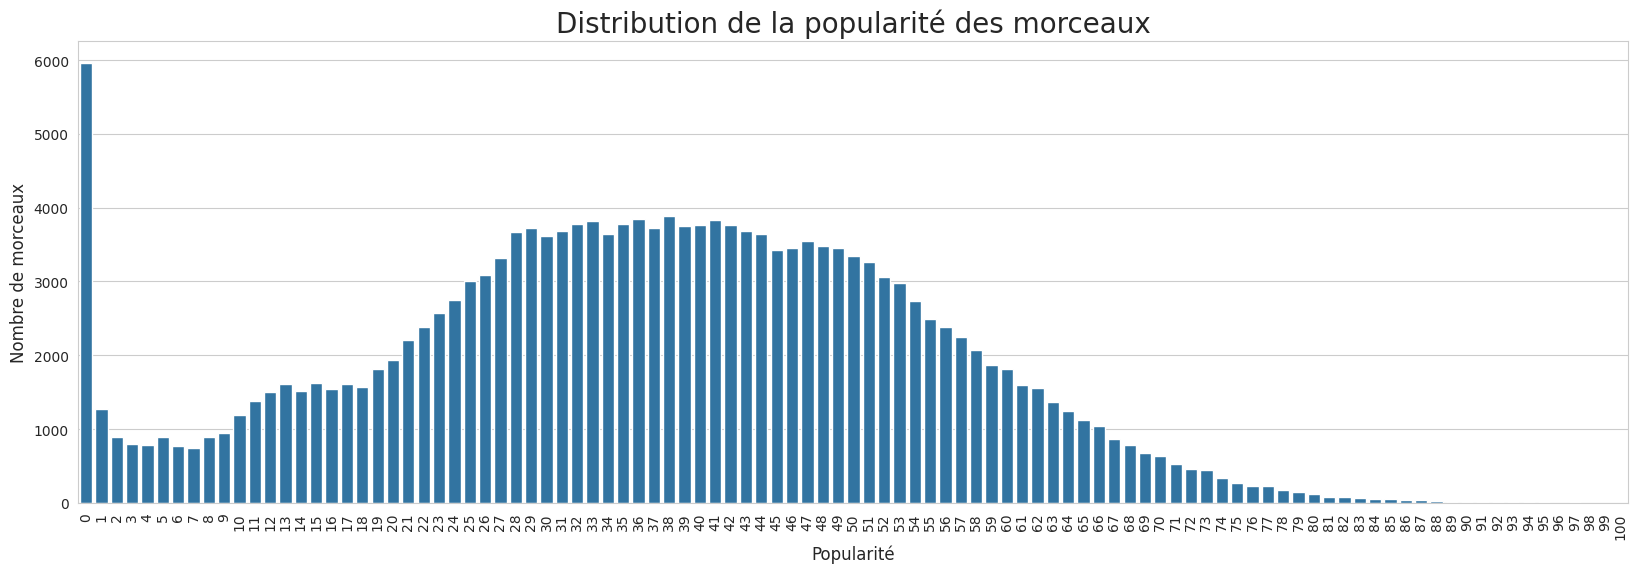

In [427]:
plt.figure(figsize=(20, 6))  
sns.countplot(data=df,
              x='popularity')

plt.title('Distribution de la popularité des morceaux', fontsize=20)
plt.xlabel('Popularité', fontsize=12)
plt.ylabel('Nombre de morceaux', fontsize=12)
plt.xticks(rotation=90)  
plt.show()

Pour chaque titre de chanson unique (track_name) sélectionne la ligne ayant la popularité maximale (popularity) dans le DataFrame df.

In [428]:
df = df.loc[df.groupby('track_name')['popularity'].idxmax()]

On décide de ne garder que les scores au dessus de 20/100 de popularité.

In [429]:
df = df[df['popularity'] >= 20] 

In [430]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 121162 lignes.


***Acousticness***

***Danceability***

***Duration ms***

***Energy***

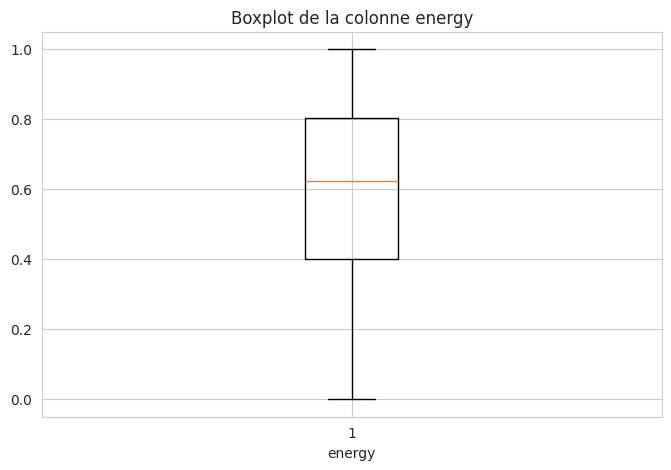

In [431]:
plt.figure(figsize=(8, 5))
plt.boxplot(x= df['energy'])

plt.title('Boxplot de la colonne energy')
plt.xlabel('energy')

plt.show()

- La médiane au-dessus de 0.6 montre que plus de la moitié des morceaux ont un niveau d’énergie modéré à élevé.
- Possible classification à réaliser morceaux en faible / moyenne / forte énergie pour répondre à l'activité

***Instrumentalness***

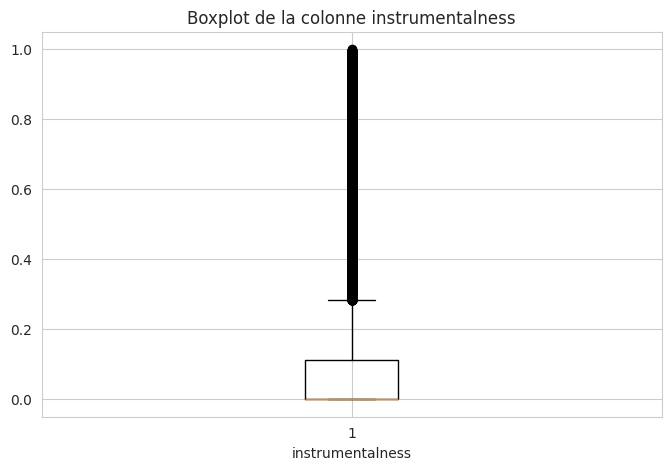

In [432]:
plt.figure(figsize=(8, 5))
plt.boxplot(x= df['instrumentalness'])

plt.title('Boxplot de la colonne instrumentalness')
plt.xlabel('instrumentalness')

plt.show()

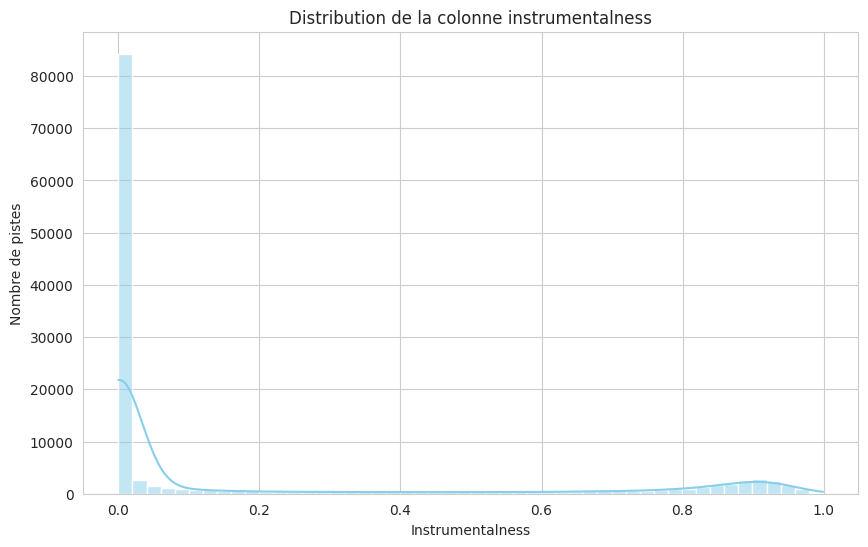

In [433]:
plt.figure(figsize=(10, 6))
sns.histplot(df['instrumentalness'], bins=50, kde=True, color='skyblue')

plt.title('Distribution de la colonne instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Nombre de pistes')
plt.grid(True)
plt.show()


- La base de données est largement dominée par des chansons vocales.
- Pas de nettoyage à réaliser.

***Liveness***

In [434]:
df['liveness'].describe()

count    121162.000000
mean          0.214067
std           0.199071
min           0.010500
25%           0.096600
50%           0.127000
75%           0.262000
max           1.000000
Name: liveness, dtype: float64

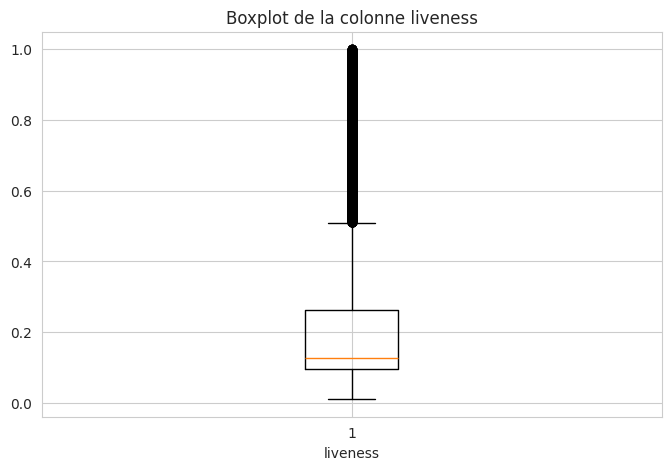

In [435]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['liveness'])

plt.title('Boxplot de la colonne liveness')
plt.xlabel('liveness')

plt.show()


- Le dataset est majoritairement composé de musique studio.
- Plus de 50 % des chansons n'ont que peu ou pas de caractéristiques live.
- Un seuil à 0.8 reste raisonnable pour retirer les vraies captations live.
- Un seuil à 0.5 "possiblement live"

In [436]:
df = df[df['liveness'] < 0.8]
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
58300,opera,maria callas,""" La Traviata "" : Amami Alfredo (Act II) - Dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4,0.0394
32571,anime,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3,0.0835
89661,hip-hop,rae sremmurd,"""42"" - From SR3MM",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4,0.3240
142359,indie,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4,0.4230
77209,children's music,barns courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,199413,0.804,0.000000,G#,0.111,-4.299,Major,0.0303,95.980,4,0.7140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,pop,got7,하드캐리 Hard Carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4,0.6120
219320,world,park hyo shin,해줄 수 없는 일 Haejul Su Eomneun Il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4,0.1550
149889,pop,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4,0.6510
220337,world,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4,0.2740


In [437]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 117059 lignes.


***Tempo***

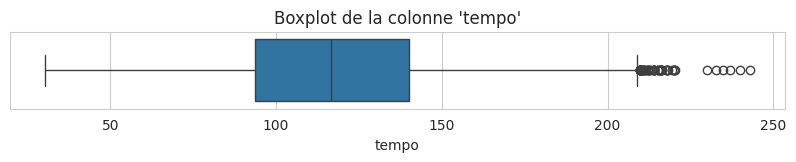

In [438]:
plt.figure(figsize=(10, 1))
sns.boxplot(x=df['tempo'])
plt.title("Boxplot de la colonne 'tempo'")
plt.show()

In [439]:
# Calcul des bornes IQR
Q1 = df['tempo'].quantile(0.25)
Q3 = df['tempo'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Borne basse : {lower_bound:.2f}")
print(f"Borne haute : {upper_bound:.2f}")

Borne basse : 23.89
Borne haute : 209.61


In [440]:
# on clean en gardant les valeurs entre les bornes
df = df[(df['tempo'] >= 23.82) & (df['tempo'] <= 208.20)]
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
58300,opera,maria callas,""" La Traviata "" : Amami Alfredo (Act II) - Dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4,0.0394
32571,anime,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3,0.0835
89661,hip-hop,rae sremmurd,"""42"" - From SR3MM",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4,0.3240
142359,indie,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4,0.4230
77209,children's music,barns courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,199413,0.804,0.000000,G#,0.111,-4.299,Major,0.0303,95.980,4,0.7140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,pop,got7,하드캐리 Hard Carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4,0.6120
219320,world,park hyo shin,해줄 수 없는 일 Haejul Su Eomneun Il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4,0.1550
149889,pop,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4,0.6510
220337,world,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4,0.2740


In [441]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 116982 lignes.


Cela signifie que toutes les valeurs de tempo en dehors de cet intervalle sont considérées comme des outliers (valeurs aberrantes).

***Loudness***

- Norme = Note comprise entre -60db et 0db.
- Moyenne (-9.569885) et médiane (-7.762000) prochent, donc faible dispersion des valeurs.
- Écart important (env. 40 points) entre la valeur minimale (-52.457000) et le 1er quartile (-11.771000). 
- La majorité des valuers se situent donc en deça du 1er quartile (25%). (au dessus non?)

- LOUDNESS (en dB, valeurs négatives)
- Moyenne -9.57 dB, médiane -7.76 dB
- 25% des morceaux < -11.77 dB : musique douce/intime
- Corrélation forte avec energy : variable redondante potentielle

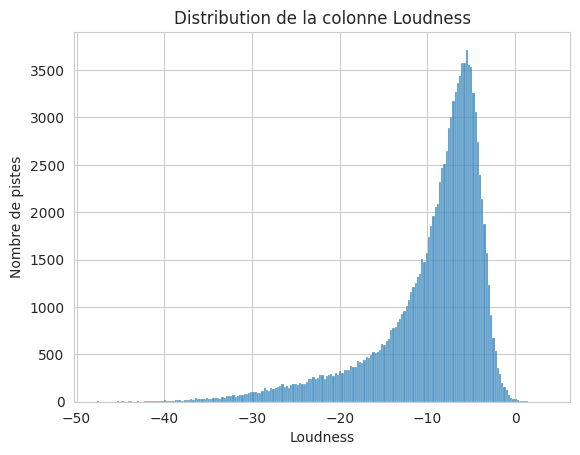

In [442]:
counts_loudness = df['loudness'].value_counts()
sns.histplot(data=df, x='loudness')
plt.title('Distribution de la colonne Loudness')
plt.xlabel('Loudness')
plt.ylabel('Nombre de pistes')
plt.show()

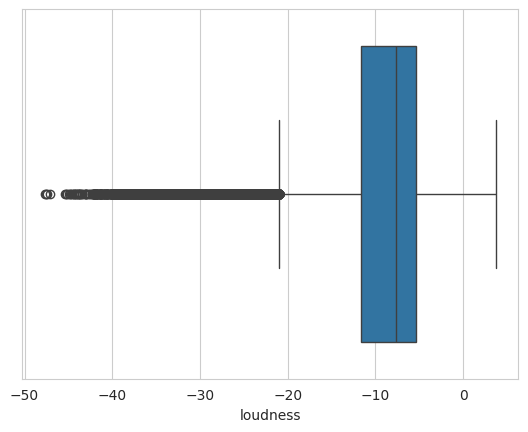

In [443]:
# Affichage d'une boite à moustache pour la variable "loudness"
# Mettre en évidence la présence d'outliers

sns.boxplot (data=df, x="loudness")
plt.show()

In [444]:
df = df[df['loudness'] <= 0]
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
58300,opera,maria callas,""" La Traviata "" : Amami Alfredo (Act II) - Dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.275,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4,0.0394
32571,anime,yuki hayashi,"""1点""",7JkDONXIbcKUQ7QzlLBumL,23,0.025000,0.250,158000,0.762,0.516000,C#,0.094,-12.794,Minor,0.0468,89.093,3,0.0835
89661,hip-hop,rae sremmurd,"""42"" - From SR3MM",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.563,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4,0.3240
142359,indie,the gaslight anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.970,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4,0.4230
77209,children's music,barns courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,199413,0.804,0.000000,G#,0.111,-4.299,Major,0.0303,95.980,4,0.7140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150871,pop,got7,하드캐리 Hard Carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.873,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4,0.6120
219320,world,park hyo shin,해줄 수 없는 일 Haejul Su Eomneun Il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.493,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4,0.1550
149889,pop,day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.874,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4,0.6510
220337,world,lee moon sae,휘파람,3G9dGrDJAPTDtJCGk8VF5i,27,0.513000,0.521,298760,0.423,0.000004,D,0.131,-6.770,Minor,0.0324,59.036,4,0.2740


In [445]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 116920 lignes.


***Speechiness***

In [446]:
df["speechiness"].describe().T

count    116920.000000
mean          0.099656
std           0.141653
min           0.022200
25%           0.036300
50%           0.048000
75%           0.092800
max           0.967000
Name: speechiness, dtype: float64

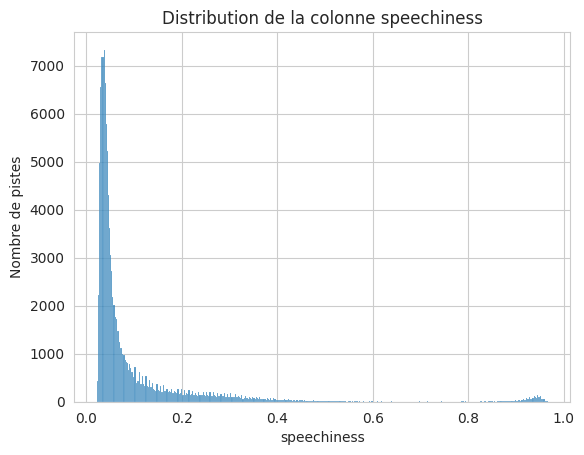

In [447]:
counts_key = df['speechiness'].value_counts()
sns.histplot(data=df, x="speechiness")
plt.title('Distribution de la colonne speechiness')
plt.xlabel('speechiness')
plt.ylabel('Nombre de pistes')
plt.show()

- On observe que la majorité des morceaux ont une "speechiness" faible (valeurs proches de 0).
- Les percentiles montrent que 90% des morceaux ont une valeur inférieure à 0.278, ce qui indique que les morceaux très "parlés" sont rares.
- La moyenne (mean) est de 0.120765, ce qui confirme que la plupart des morceaux contiennent peu de paroles selon ce critère.

In [448]:
df = df[df['speechiness']<=0.66]

In [449]:
print(f"Le dataset a désormais {len(df)} lignes.")

Le dataset a désormais 114731 lignes.


***Valence***

In [450]:
df['valence'].describe()

count    114731.000000
mean          0.458404
std           0.267846
min           0.000000
25%           0.230000
50%           0.451000
75%           0.676000
max           1.000000
Name: valence, dtype: float64

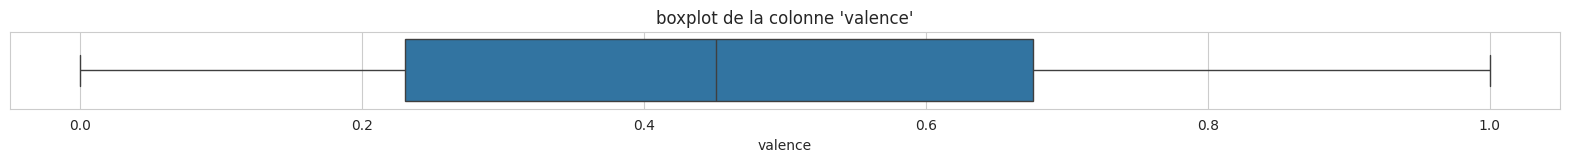

In [451]:
plt.figure(figsize=(20, 1))
sns.boxplot(x=df['valence'])
plt.title("boxplot de la colonne 'valence'")
plt.show()

<h1>Enrichissement</h1>

**API LAST FM**

**SPOTIFY API**

**MUSICBRAINZ**

- Réviser la colonne genre.
- agrémenter des paroles.
- agrémenter des pochettes d'album